In [0]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [0]:
################################### LINEAR REGRESSION ###########################################
## GUILHERME CARVALHO PEREIRA
## IMPORTING LIBARIES
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import linear_model
import sklearn.preprocessing
import math,time, quandl
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

## DEFINING THE STYLE OF THE PLOTS
style.use('ggplot')

## GETING THE DATE SET FORM QUANDL
quandl.ApiConfig.api_key = 'G9SiyZ49oi4T_KYraTQs'
df = quandl.get('WIKI/GOOGL', index_col='Date', parse_dates=True)
## PREVIEWING THE DATA
#print(df_raw.head())

## GETING THE FEATURES MORE MEANINGFUL
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

#################################################################################################
## DEFINING THE SPECIAL RELATIONSHIP BETWEEN THE FEATURES

## HIGH_LOW_PERCENT (HL_PCT) => THIS FEATURE GIVE US THE PERCENT VOLATILITY OF THE STOCKS
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] *100 

## PERCENT_CHANGE (PCT_CHANGE) => THIS FEATURE GIVE US THE DAILY MOVE OF THE STOCKS
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']*100.0

## DEFINING THE DATAFRAME WITH THE SPECIAL RELATIONSHIPS
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
## PREVIEWING THE DATA
#print(df.head())

## DEFINING THE LABEL... THE 'THING' WE WANT TO PREDICT
forecast_col = 'Adj. Close'

## FILLING THE NaN DATA ON THE DATASET
df.fillna(-99999, inplace=True)

## GETING 10% OF THE DATAFRAME AND TRY TO PREDICT
pct_data = 0.01  ##GIVE HOW MUCH OF THE DATASET WE ARE TRYING TO PREDICT
forecast_out = int(math.ceil(pct_data*len(df)))

## ADD THE LABEL TO THE DATAFRAME
df['Label'] = df[forecast_col].shift(-forecast_out)  ##JUST THE COLLUMS 10 DAYS ON THE FUTURE
## PREVIEWING THE DATA
#print(df.head())

## DEFINING X AND y FOR OUR HYPOTHESIS
X = np.array(df.drop(['Label'], 1))

## SCALING OUR FEATURES
X = sklearn.preprocessing.scale(X)

## DEFINING THE DATA FRO THE FORECAST
X_lately = X[-forecast_out:]  ##DATA TO FORECAST
X = X[:-forecast_out]

## DEVIDING OUR DATA INTO TRAINING AND DATA SET...TESTE SIZE IN %
df.dropna(inplace = True)
y = np.array(df['Label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## DEFINING OUR LINEAR REGRESSION HYPOTHESIS
hypo = linear_model.LinearRegression()
hypo.fit(X_train, y_train)

############################################################################################
'''' SAVING THE HYPOTHESIS IN A PICKLE FILE TO AVOID TRAIN EVERYTIME THAT THE CODE RUN
     IF IS THE SECOND TIME THAT YOU RUN THIS CODE IS A GOOD IDEA UNCOMMENT THIS PART AND
     COMMENT THE TW LINES ABOVE
'''
#with open('linearregression.pickle', 'wb') as file_name:
#    pickle.dump(hypo, file_name)
#pickle_in = open('linearregression.pickle', 'rb')
#hypo = pickle_in
############################################################################################

## COMPUTATING HOW ACCURATE THE FIT IS
accuracy = hypo.score(X_test, y_test)
##print'THIS ALGORITHM PREDICTS THE OUTPUT WITH A ACCURACY OF {}%'.format(accuracy*100)
## PREDICTION THE NEXT PRICE OF THE STOCKS
y_predict = hypo.predict(X_lately)

#################################################################################################

## PREPARING THE DATA SET TO BE PLOT
df['Forecast'] = np.nan
df.index
last_date = df.iloc[-1].name
last_unix = time.mktime(time.strptime(str(last_date), "%Y-%m-%d %H:%M:%S")) # .timestamp()
one_day = 86400
next_unix = last_unix + one_day

## AJUSTING THE DATA IN THE X AXIS
for i in y_predict:
    next_date = dt.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

##PLOTING THE DATA AND THE PREDICTION
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [0]:
########################## LINEAR REGRESSION FUNCTION FROM SCRATCH ##########################
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

''' THIS FUNCTION CALCULATES THE BEST FIT LINE TO A REGRESSION MODEL
    THE FUNCTION TAKES TWO PARAMETES:
    X -> DATA TO BE FIT AS THE x AXIS : DATA TYPE => numpy.array
    y -> DATA TO BE FIT AS THE y AXIS : DATA TYPE => numpy.array
'''
def best_fit_line(X,y):
    ## COMPUTATING m
    m = (((mean(X)*mean(y)) - mean(X*y))/
        ((mean(X)**2)-mean(X**2)))
    b = mean(y) - m*mean(X)
    ## RETURNING THE SLOPE AND INTERCEPT
    return m, b


''' THIS FUNCTION CALCULATES THE SQUARED ERROR TO A REGRESSION MODEL
    THE FUNCTION TAKES TWO PARAMETES:
    y -> DATA TO BE FIT AS THE y AXIS : DATA TYPE => numpy.array
    regression_model -> DATA PREDICT USING THE best_fit_line function : DATA TYPE => numpy.array
'''
def squared_error(y, regression_modele):
    return sum((regression_model - y)*(regression_model - y))

''' THIS FUNCTION CALCULATES THE COEFICIENT OF DETERMINATION TO A REGRESSION MODEL
    THIS COEFICIENT TELLS US HOW "GOOD" IS THE REGRESSION MODEL...GOOD MODEL OR NOT
    A GOOD COEFICENT VALUE IS THE CLOSE TO 1 AS POSSIBLE
    THE FUNCTION TAKES TWO PARAMETES:
    y -> DATA TO BE FIT AS THE y AXIS : DATA TYPE => numpy.array
    regression_model -> DATA PREDICT USING THE best_fit_line function : DATA TYPE => numpy.array
'''
def coef_of_determination(y, regression_model):
    y_mean = [mean(y_line) for y_line in y]
    
    squared_error_regression = squared_error(y, regression_model)
    squared_error_mean = squared_error(y, y_mean)
    
    print y_mean, squared_error_regression, squared_error_mean
    
    return (1-(squared_error_regression/squared_error_mean))

## TESTING DATA

X = np.array([1,2,3,4,5,6], dtype=np.float64)
y = np.array([5,4,6,5,6,7], dtype=np.float64)

## CALLING THE FUNCTION

[m,b] = best_fit_line(X,y)

print m, b

## LINE FIT

regression_model = [(m*x)+b for x in X]

## TESTING HOW GOOD THE LINE FITS THIS DATA

r_squared = coef_of_determination(y, regression_model)
print r_squared

## PLOTING THE DATA
plt.scatter(X,y)
plt.plot(X,regression_model)
plt.show()



In [0]:
##################################### CLASSIFICATION ###########################################
## GUILHERME CARVALHO PEREIRA
## IMPORTING LIBARIES
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import neighbors
import sklearn.preprocessing
import pandas as pd
import numpy as np


## DEFINING THE DATAFRAME
df = pd.read_csv('breast-cancer-wisconsin.data')

## PREVIEW 
#print (df.head())

##CLEANING THE DATAFRAME
df.replace('?', -99999, inplace=True) ##REPLACE THE MISSING DATA
df.drop(['id'], 1, inplace=True) ##REMOVING THE ID COL

## PREVIEW
#print(df.head())

## DEFINING THE FEATURES
X = np.array(df.drop(['class'],1))

## DEFINING THE LABEL
y = np.array(df['class'])

## DEFING THE TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## CREATING THE K-NEAREST NEIIGHBORGS
hypo = neighbors.KNeighborsClassifier()
hypo.fit(X_train, y_train)

## TESTING THE HYPOTHESIS ACCURACY
accuracy = hypo.score(X_test, y_test)
print 'THE ACCURACY OF THE K-NEARREST NEIGHBORGS IS {}%'.format(accuracy*100)


In [0]:
########################## K-NEARREST NEIGHBORGS FROM SCRATCH ##############################
import numpy as np
import math
import warnings
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import style

## DEFINING THE STYLE
style.use('fivethirtyeight')

'''
## FIRST TEST
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
''' 

''' PREVIEWING THE DATASET
## PLOTING THE DATASET
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
'''
## SAME FOR LOOP
'''for i in dataset:
       for ii in dataset[i]:
           plt.scatter(ii[0], ii[1], s=100, color=i)
'''
'''
## POLTING THE NEW FEATURE
plt.scatter(new_features[0], new_features[1], s=100)
'''


def k_nearest_neighborgs(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('**THE K IS SET TO A VALUE LESS THAN TOTAL VOTING GROUP!**')
    distance = []
    for group in data:
        for features in data[group]:
            euclid_dist = np.linalg.norm(np.array(features) - np.array(predict))
            distance.append([euclid_dist, group])
    
    votes = [i[1] for i in sorted(distance)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

############################################################################################
## DEFINING THE DATAFRAME
df = pd.read_csv('breast-cancer-wisconsin.data')

## CLEANING THE DATAFRAME
df.replace('?', -99999, inplace=True) ##REPLACE THE MISSING DATA
df.drop(['id'], 1, inplace=True) ##REMOVING THE ID COL

## SHUFFLING THE DATASET
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

## DEFENING THE TRAIN AND TEST DATASETS
test_size = 0.2  ##  20% OF THE FULL DATA
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]
for i in train_data:  ##  PASSING THE DATA TO THE DIC
    train_set[i[-1]].append(i[:-1])
for i in test_data:   ##  PASSING THE DATA TO THE DIC
    test_set[i[-1]].append(i[:-1])

    
## CLASSICATIONG THE DATASET
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighborgs(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
            
## PRINTING THE ACCURACY OF THE CODE
print 'THE ACCURACY OF THE K-NEARREST NEIGHBORGS IS {}%'.format((float(correct)/total)*100)


THE ACCURACY OF THE K-NEARREST NEIGHBORGS IS 94.964028777%


In [0]:
######################################### SVM ##############################################
## GUILHERME CARVALHO PEREIRA
## IMPORTING LIBARIES
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import svm
import sklearn.preprocessing
import pandas as pd
import numpy as np


## DEFINING THE DATAFRAME
df = pd.read_csv('breast-cancer-wisconsin.data')

## PREVIEW 
#print (df.head())

##CLEANING THE DATAFRAME
df.replace('?', -99999, inplace=True) ##REPLACE THE MISSING DATA
df.drop(['id'], 1, inplace=True) ##REMOVING THE ID COL

## PREVIEW
#print(df.head())

## DEFINING THE FEATURES
X = np.array(df.drop(['class'],1))

## DEFINING THE LABEL
y = np.array(df['class'])

## DEFING THE TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## CREATING THE K-NEAREST NEIIGHBORGS
hypo = svm.SVC()
hypo.fit(X_train, y_train)

## TESTING THE HYPOTHESIS ACCURACY
accuracy = hypo.score(X_test, y_test)
print 'THE ACCURACY OF THE SVM IS {}%'.format(accuracy*100)


THE ACCURACY OF THE SVM IS 95.7142857143%


OPTIMIZED A STEP...
OPTIMIZED A STEP...
OPTIMIZED A STEP...


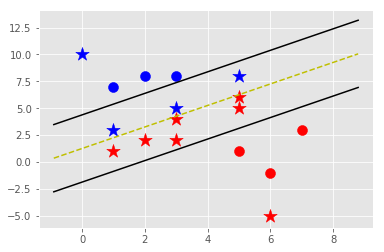

In [0]:
############################### SVM FROM SCRATCH ###########################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
style.use('ggplot')
############################################################################################
class Support_Vector_Machine:
    '''
    CONSTRUCTOR METHOD INICIALIZE THE OBJECT
    ''' 
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {-1:'b', 1:'r'}
        
        ## FIRST CHECK
        if visualization:
            self.figure = plt.figure()
            self.ax = self.figure.add_subplot(1,1,1)  ##EQ TO SUBPLOT ON MATLAB
    
## METHODS    
    '''
    THIS METHOD COMPUTE THE HYPERPLANES GIVEN A DATASET. THIS METHOD TAKES DATASET IN DICTIONARY FORMAT
    THIS METHOD CALCULATE THE VECTOR W AND THE BIAS b
    THE HYPERPLANE EQUATIONS IS GIVEM BY W*X+b
    '''
    def train(self, data):
        self.data = data
        ## DICTIONARY WITH THE MAGNITUDES OF THE 'FIT' VECTORES
        opt_dict = {}
        
        transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
        all_data = []
        
        for yi in self.data:
            for featureset in self.data[yi]:
                for features in featureset:
                    all_data.append(features)
        
        self.max_features_val = max(all_data)
        self.min_features_val = min(all_data)
        
        all_data = None
        
        step_sizes = [self.max_features_val*0.1, self.max_features_val*0.01, 
                      self.max_features_val*0.01]  ## ABOVE THIS POINT IS COMPUTATIONAL EXPENSIVE
        
        ## COMPUTATIONAL EXPENSIVE
        b_range_multiple = 5
        
        ##
        b_multiple = 5
        
        ##
        latest_optimum = self.max_features_val*10
        
        ##
        for step in step_sizes:
            W = np.array([latest_optimum,latest_optimum])
            optimized = False  ## CONVEX PROBLEM
            while not optimized:
                for b in np.arange(-1*(self.max_features_val*b_range_multiple), self.max_features_val*b_range_multiple, step*b_multiple):
                    for transformation in transforms:
                        w_t = W*transformation
                        found_option = True
                        ##
                        ##
                        ##
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                        ##
                        ##
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                
                ##
                ##
                if W[0] < 0:
                    optimized = True
                    print('OPTIMIZED A STEP...')
                else:
                    W = W-step
            ##
            ##
            norms = sorted(n for n in opt_dict)
            
            ##
            ##
            opt_choice = opt_dict[norms[0]]
            self.W = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
        
    
    '''
    THIS METHOD USE THE SVM TRAINED AND PREDICT THE NEW DATA ABSE ON THE HYPERPLANES DEFINED
    '''
    def predict(self, features):
        
        ## CHECKING THE SIGN
        classification = np.sign(np.dot(np.array(features), self.W)+self.b)
        
        ##
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1],marker='*', s=200, c=self.colors[classification])
        
        ##
        return classification
    
    '''
    THIS METHOD IS USE TO VISUALIZE THE DATA CLASSIFID BY THE SVM PREDICT METHOD
    '''
    def visualize(self):
        ##
        [[self.ax.scatter(x[0],x[1],s=100,c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        ##
        def hyperplane(x,w,b,v):
            ##
            return (-w[0]*x+v-b)/w[1]
        
        ## LIMITES FOR THE PLOT
        datarange = (self.min_features_val*0.9, self.max_features_val*1.1)
        hyper_x_min = datarange[0]
        hyper_x_max = datarange[1]
        
        ## POSITIVE SUPORT HYPERPLANE (PSH)
        ## (W*x+b)=1
        psh_1 = hyperplane(hyper_x_min, self.W, self.b, 1)
        psh_2 = hyperplane(hyper_x_max, self.W, self.b, 1)
        
        ## PLOTING THE HYPERPLANE
        self.ax.plot([hyper_x_min, hyper_x_max], [psh_1,psh_2], 'k')
        
        ## NEGATIVE SUPORT HYPERPLANE (NSH)
        ## (W*x+b)=-1
        nsh_1 = hyperplane(hyper_x_min, self.W, self.b, -1)
        nsh_2 = hyperplane(hyper_x_max, self.W, self.b, -1)
        
        ## PLOTING THE HYPERPLANE
        self.ax.plot([hyper_x_min, hyper_x_max], [nsh_1,nsh_2], 'k')
        
        ## DECISION BONDARY HYPERPLANE (DBH)
        ## (W*x+b)=1
        dbh_1 = hyperplane(hyper_x_min, self.W, self.b, 0)
        dbh_2 = hyperplane(hyper_x_max, self.W, self.b, 0)
        
        ## PLOTING THE HYPERPLANE
        self.ax.plot([hyper_x_min, hyper_x_max], [dbh_1,dbh_2],'y--')
        
        ## PLOTING EVERYTHING
        plt.show()
        
## END OF THE CLASS        
############################################################################################       
        
## TEST        
data_dict = {-1:np.array([[1,7], [2,8], [3,8],]), 1:np.array([[5,1], [6,-1], [7,3],])}


## EXAMPLE
hypo = Support_Vector_Machine()
hypo.train(data_dict)


## PREDICTION TEST
predict_us = [[0,10], [1,3], [3,4], [3,5], [5,5], [5,6], [6,-5], [5,8], [3,2], [1,1], [2,2]]

for i in predict_us:
    hypo.predict(i)

hypo.visualize()


In [0]:
# Mathieu Blondel, September 2010
# License: BSD 3 clause
# http://www.mblondel.org/journal/2010/09/19/support-vector-machines-in-python/

# visualizing what translating to another dimension does
# and bringing back to 2D:
# https://www.youtube.com/watch?v=3liCbRZPrZA

# Docs: http://cvxopt.org/userguide/coneprog.html#quadratic-programming
# Docs qp example: http://cvxopt.org/examples/tutorial/qp.html

# Nice tutorial:
# https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf


import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(gaussian_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
    test_linear()
    #test_non_linear()
    #test_soft()

     pcost       dcost       gap    pres   dres
 0: -1.4143e+01 -2.8316e+01  5e+02  2e+01  2e+00
 1: -1.9106e+01 -1.6341e+01  2e+02  8e+00  7e-01
 2: -1.9269e+01 -7.6497e+00  7e+01  2e+00  2e-01
 3: -6.4108e+00 -4.2617e+00  9e+00  3e-01  2e-02
 4: -3.6827e+00 -3.8382e+00  2e-01  1e-04  1e-05
 5: -3.8036e+00 -3.8052e+00  2e-03  1e-06  1e-07
 6: -3.8048e+00 -3.8048e+00  2e-05  1e-08  1e-09
 7: -3.8048e+00 -3.8048e+00  2e-07  1e-10  1e-11
Optimal solution found.
3 support vectors out of 180 points
19 out of 20 predictions correct


# **UNSUPERVISED LEARNING

/home/guilhermelinux/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/guilhermelinux/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/guilhermelinux/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/guilhermelinux/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


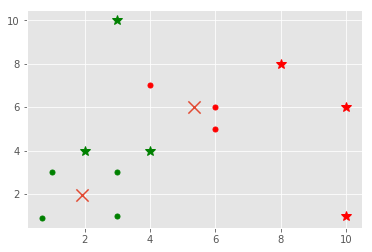

In [0]:
################################## K-MEANS #################################################
## IMPORTING lIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans

## DEFINING THE STYLE
style.use('ggplot')

## DEFINING THE DATA SET
X = np.array([[1,3],[0.7,0.9],[3,1],[6,5],[4,7],[6,6],[3,3]])

## PREVIEWING THE DATA
#plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5, zorder = 10)
#plt.show()

## DEFINING THE NUMBER OF CLUSTERS
hypo = KMeans(n_clusters=2)

## FITING THE HYPOTHESIS
hypo.fit(X)

## PREDICTION ARRAY
predict_us = np.array([[2,4],[4,4],[3,10],[10,1],[8,8],[10,6]])

## TESTING THE PREDICTION
hypo.predict(predict_us)

## GETING THE CENTROID POSITION AND THE LABELS
means_centroids = hypo.cluster_centers_
labels = hypo.labels_

## PLOTING THE CLUSTERING RESULT
colors = ['g.', 'r.', 'b.']
## PLOTING THE TRAINING DATA
[plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10) for i in range(len(X))]
## PLOTING THE PREDICT DATA
[plt.plot(predict_us[i][0], predict_us[i][1], colors[labels[i]], marker = '*', markersize = 10) for i in range(len(predict_us))] 
## PLOTING THE CENTROID
plt.scatter(means_centroids[:,0], means_centroids[:,1], marker = 'x', s=150)
plt.show()

In [0]:
################################### TITANIC KMEANS #########################################
## IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn.preprocessing
from sklearn.cluster import KMeans

## DEFINING THE STYLE
style.use('ggplot')

## FUNCTIONS

'''
THIS FUNCTION CONVERT THE NON NUMERICAL DATA PRESENT I THE DATA SET TO A NUMERICAL DATA
THIS FUNCTION TAKES AS A INPUT THE DATAFRAME THAT NEEDS TO BE CHANGE AND RETURN THE SAME
DATAFRAME AFTER THE CONVERTION

'''
def convert_non_numerical_data(df):
    columns = df.columns.values
    
    ## CHECK FOR EACH COLUMS IN THE DATAFRAME
    for column in columns:
        test_digt_value = {}
        
        ## THIS FUNCTION IS RESPONSIBLE TO ACTUALY CONVERT THE DATA TO A INT
        def convert_to_int(value):
            return test_digt_value[value]
        
        ## CKECK TO SEE IF THE DATAPOINT NON NUMERICAL
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            ## GET THE UNIQUE VALUES 
            x=0
            for unique in unique_elements:
                if unique is not test_digt_value:
                    test_digt_value[unique] = x
                    x += 1
            ##MAP THE VALUES INTO TEH COLUMN
            df[column] = list(map(convert_to_int, df[column]))
            
    ## RETURN THE DATAFRAME AFTER CONVERSION
    return df

## EXTRACTING THE DATASET
df = pd.read_excel('titanic.xls')
## PREVIEW THE DATA
#print df.head()

## WRANGILING THE DATA
df.drop(['body', 'name'], 1, inplace = True)
df.fillna(0, inplace = True)
df = convert_non_numerical_data(df)
## PREVIEW THE DATA
#print df.head()

## DEFINING THE FEATURE SET
X = np.array(df.drop(['survived',], 1)).astype(float)
X = sklearn.preprocessing.scale(X)
## DEFINING THE LABELS SET...TO SEE THE ACCURACY
y = np.array(df['survived'])

## DEFINING THE HYPOTHESIS AND TRAINING IT
hypo = KMeans(n_clusters = 2)   ##SURVIVED??
hypo.fit(X)

## TESTING ACCURACY
correct = 0
for i in range(len(X)):
    predict_us = np.array(X[i].astype(float))
    predict_us = predict_us.reshape(-1, len(predict_us))
    prediction = hypo.predict(predict_us)
    if prediction == y[i]:
        correct +=1
print('THE ACCUCARY IS {}%').format(100*float(correct)/float(len(X)))

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.xls'

In [0]:
################################# K-MEANS FROM SCRATCH #####################################
## IMPORTING lIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn.preprocessing

## DEFINING THE STYLE
style.use('ggplot')

## DEFING THE CLASS FOR THE K-MEANS CLASSIFIER
class K_Means:
    ## CONSTRUCTOR
    def __init__(self, k_cluster = 2, tol = 0.001, max_iter = 300):
        ## DEFINING THE ATRIBUTES
        self.k_cluster = k_cluster
        self.tol = tol
        self.max_iter = max_iter
        
    ## CREATING THE METHODS
    '''
    THIS METHOD FINDS THE CLUSTERS PRESENT ON OUR DATA, THE CLUSTERS ARE COMPUTE BASE ON
    THE K-MEANS ALGORITHM.
    FOR THE FIRST ITERATION THE CENTROIDS ARE THE Kth FISRTS ELEMENTS ON THE DATA
    FOR LATER ITERATION THE CENTROIDS MOVE BASE ON THE MEAN OF THE DATAPOINTS ON THE CLUSTER
    THE ALGORITHM CONVERGES WHEN THE CENTROIDS STOPS MOVING BETWEEN THE TOLERATION
    
    self -> CLASS REFERENCE FOR ATRIBUTES
    data -> TRAINING DATA
    '''
    def fit(self, data):
        ## DEFINING THE ATRIBUTES
        self.centroids = {}
        
        ## DEFINING THE POSITION OF THE CENTROIDS FOR THE FIRST ITERATION
        for i in range(self.k_cluster):
            self.centroids[i]  = data[i]   ##THE POSITION ARE THE FIRST Ith ELEMENTS
        
        ## START THE CLASSIFICATION PROCESS
        for i in range(self.max_iter):
            self.classifications = {}
            
            ## CLASSIFICATING FOR EACH K CENTROID
            for i in range(self.k_cluster):
                self.classifications[i] = []   ##CLEANING FOR EACH CENTROID
                
            ## COMPUTING THE DISTACE OF THE FEATURESET FOR EACH CENTROID
            for featureset in data:
                dist = [np.linalg.norm(featureset-self.centroids[centroid])for centroid in self.centroids]
                classification = dist.index(min(dist))   ##TAKING THE CLOSEST ONE
                self.classifications[classification].append(featureset)
                
            ## SAVING THE VALUE OF THE CENTROIDS FOR FOWARD COMPARATION
            prev_centroids = dict(self.centroids)
                
            ## TAKING THE MEAN OF THE CLUSTERS AND MOVE THE CENTROIDS 
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
                            
            ## VERIFING IF THE CLUSTERS ARE FOUND 
            clusters_found = True
                
            ## CHECKING THE TOLERANCE
            for cent in self.centroids:
                previous_centroid = prev_centroids[cent]
                current_centroid = self.centroids[cent]
                if float(np.sum((current_centroid-previous_centroid)/(previous_centroid*100.0))) > self.tol:   ## TOL IS IN %
                    clusters_found = False   ##NOT FOUNDED!!!
                
            ## WE FOUNDED!!
            if clusters_found:
                    break
                    
    
    '''
    THIS METHOD USE THE CENTROIDS POSITION COMPUTED ON THE fit METHOD TO FIND THE CLUSTERS 
    FOR THE PREDICTION DATA
    
    self -> CLASS REFERENCE FOR ATRIBUTES
    data -> PREDICTION DATA
    '''
    def predict(self, data):
        ## COMPUTING THE DISTACE OF THE DATA FOR EACH CENTROID
        dist = [np.linalg.norm(data-self.centroids[centroid])
                            for centroid in self.centroids]
        classification = dist.index(min(dist))   ##TAKING THE CLOSEST ONE
        return classification
    

## FUNCTIONS

'''
THIS FUNCTION CONVERT THE NON NUMERICAL DATA PRESENT I THE DATA SET TO A NUMERICAL DATA
THIS FUNCTION TAKES AS A INPUT THE DATAFRAME THAT NEEDS TO BE CHANGE AND RETURN THE SAME
DATAFRAME AFTER THE CONVERTION

'''
def convert_non_numerical_data(df):
    columns = df.columns.values
    
    ## CHECK FOR EACH COLUMS IN THE DATAFRAME
    for column in columns:
        test_digt_value = {}
        
        ## THIS FUNCTION IS RESPONSIBLE TO ACTUALY CONVERT THE DATA TO A INT
        def convert_to_int(value):
            return test_digt_value[value]
        
        ## CKECK TO SEE IF THE DATAPOINT NON NUMERICAL
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            ## GET THE UNIQUE VALUES 
            x=0
            for unique in unique_elements:
                if unique is not test_digt_value:
                    test_digt_value[unique] = x
                    x += 1
            ##MAP THE VALUES INTO TEH COLUMN
            df[column] = list(map(convert_to_int, df[column]))
            
    ## RETURN THE DATAFRAME AFTER CONVERSION
    return df

## EXTRACTING THE DATASET
df = pd.read_excel('titanic.xls')
## PREVIEW THE DATA
#print df.head()

## WRANGILING THE DATA
df.drop(['body', 'name'], 1, inplace = True)
df.fillna(0, inplace = True)
df = convert_non_numerical_data(df)
## PREVIEW THE DATA
#print df.head()

## DEFINING THE FEATURE SET
X = np.array(df.drop(['survived',], 1)).astype(float)
X = sklearn.preprocessing.scale(X)
## DEFINING THE LABELS SET...TO SEE THE ACCURACY
y = np.array(df['survived'])


## DEFINING THE HYPOTHESIS AND TRAINING IT
hypo = K_Means()
hypo.fit(X)

## TESTING ACCURACY
correct = 0
for i in range(len(X)):
    predict_us = np.array(X[i].astype(float))
    predict_us = predict_us.reshape(-1, len(predict_us))
    prediction = hypo.predict(predict_us)
    if prediction == y[i]:
        correct +=1
print('THE ACCUCARY IS {}%').format(100*float(correct)/float(len(X)))



THE ACCUCARY IS 69.1367456073%


In [0]:
##################################### MEANS SHIFT ##########################################
## IMPORTING lIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
import sklearn.preprocessing
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs

## DEFINING THE STYLE
style.use('ggplot')

## FIRST ITERATION CENTROIDS
centers = [[1,1,1],[5,5,5],[3,10,10]]

## CREATING THE TRAINIG DATA
X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

## DEFINING MEANS SHIFT HYPOTHESIS AND TRAINING
hypo = MeanShift()
hypo.fit(X)

## GETING THE CENTROID POSITION AND THE LABELS
cluster_centroids = hypo.cluster_centers_
labels = hypo.labels_

## PRINTING THE NUMBER OF CLUSTERS
n_cluster_ = len(np.unique(labels))
print 'THE NUMBER OF CLUSTERS FINDS BY MEAN SHIFT IS ',n_cluster_

## DEFINING THE 3D SPACE
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

## PLOTING THE DATA IN THE 3D SPACE
colors = 10*['r','g','b','c','k','y','m']
for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c = colors[labels[i]], marker = 'o')
    
## PRINTING THE CENTROIDS CLUSTERS
ax.scatter(cluster_centroids[:,0], cluster_centroids[:,1], cluster_centroids[:, 2], marker = 'x', color = 'k', s = 150, linewidths = 5, zorder = 10)

THE NUMBER OF CLUSTERS FINDS BY MEAN SHIFT IS  3


In [0]:
################################ TITANIC MEANSHIFT #########################################
## IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn.preprocessing
from sklearn.cluster import MeanShift

## FUNCTIONS

'''
THIS FUNCTION CONVERT THE NON NUMERICAL DATA PRESENT I THE DATA SET TO A NUMERICAL DATA
THIS FUNCTION TAKES AS A INPUT THE DATAFRAME THAT NEEDS TO BE CHANGE AND RETURN THE SAME
DATAFRAME AFTER THE CONVERTION

'''
def convert_non_numerical_data(df):
    columns = df.columns.values
    
    ## CHECK FOR EACH COLUMS IN THE DATAFRAME
    for column in columns:
        test_digt_value = {}
        
        ## THIS FUNCTION IS RESPONSIBLE TO ACTUALY CONVERT THE DATA TO A INT
        def convert_to_int(value):
            return test_digt_value[value]
        
        ## CKECK TO SEE IF THE DATAPOINT NON NUMERICAL
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            ## GET THE UNIQUE VALUES 
            x=0
            for unique in unique_elements:
                if unique is not test_digt_value:
                    test_digt_value[unique] = x
                    x += 1
            ##MAP THE VALUES INTO TEH COLUMN
            df[column] = list(map(convert_to_int, df[column]))
            
    ## RETURN THE DATAFRAME AFTER CONVERSION
    return df

## EXTRACTING THE DATASET
df = pd.read_excel('titanic.xls')
## PREVIEW THE DATA
#print df.head()

##MAKING A SECURITY COPY OF THE ORIGINAL DATASET
original_df = pd.DataFrame.copy(df)

## WRANGILING THE DATA
df.drop(['body', 'name'], 1, inplace = True)
df.fillna(0, inplace = True)
df = convert_non_numerical_data(df)
## PREVIEW THE DATA
#print df.head()

## DEFINING THE FEATURE SET
X = np.array(df.drop(['survived',], 1)).astype(float)
X = sklearn.preprocessing.scale(X)
## DEFINING THE LABELS SET...TO SEE THE ACCURACY
y = np.array(df['survived'])

## DEFINING THE HYPOTHESIS AND TRAINING IT
hypo = MeanShift()   ##FINDING THE CLUSTERS
hypo.fit(X)

## GETING THE CENTROID POSITION, LABELS AND NUMBER OS CLUSTERS
cluster_centroids = hypo.cluster_centers_
labels = hypo.labels_
n_clusters = np.unique(labels)

## REMOVE THE WARNNIG MENSAGE OF CHANGING A COPY DATAFRAME 
pd.options.mode.chained_assignment = None


## CREATING THE CLUSTER COLUMN AT THE DATASET
original_df['cluster_group'] = np.nan
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

## FIDING THE SURVIVAL RATES FOR EACH CLUSTER
survival_rates = {}
for i in range(len(cluster_centroids)):
    aux_df = original_df[(original_df['cluster_group'] == float(i))]
    survival_in_cluster = aux_df[(aux_df['survived'] == 1)]
    survival_rate = float(len(survival_in_cluster))/float(len(aux_df))
    survival_rates[i] = survival_rate
    
print (survival_rates)

## PLAYING WUTH THE DATA...****KEEP IN MIND THAT THE RESULTS MAY VARY DUE TO THE MEANSHITH ALGORITHM PROPERTIES

#print(original_df[(original_df['cluster_group'] == 0)].describe())
#print(original_df[(original_df['cluster_group'] == 1)].describe())
#print(original_df[(original_df['cluster_group'] == 2)].describe())

{0: 0.37782982045277125, 1: 0.8333333333333334, 2: 0.1}


3


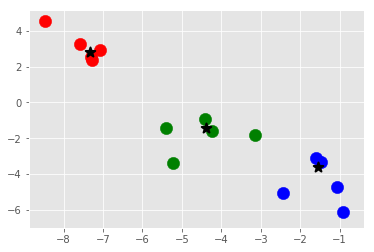

In [0]:
############################### MEANSHIFT FROM SCRATCH #####################################
## IMPORTING lIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.datasets.samples_generator import make_blobs

## DEFINING THE STYLE
style.use('ggplot')

## DEFINING THE CLASS FOR THE MEANSHIFT CLASSIFIER
class Mean_Shift:
    
    ## CONSTRUCTOR METHOD
    def __init__(self, radius = None, bandwidth_size = 100):
        ## DEFINING THE ATRIBUTE
        self.radius = radius
        self.bandwidth_size = bandwidth_size
    
    ## CREATING THE METHODS
    '''
    THIS METHODS CALCULATE THE RADIUS AND THE WEIGTHS. THE RADIUS IS THE DIVISION OF THE ALL 
    DATA CENTROID BY THE BANDWIDTH SIZE. THE WEIGTHS ARE THE INVERSE OF THE BANDWIDTH SIZE,
    POINTS CLOSE TO THE CENTROIDS HAVE LESS WEIGTH.
    
    self -> CLASS REFERENCE FOR ATRIBUTES
    data -> PREDICTION DATA
    '''
    def radius_and_weigths(self, data):
        ## FINDING THE CENTROID OF ALL DATASET
        all_data_centroid = np.average(data)
        all_data_dist = np.linalg.norm(all_data_centroid)
        self.radius = float(all_data_dist)/float(self.bandwidth_size)
        ## DEFINIG THE WEIGTHS
        weigths = [i for i in range(self.bandwidth_size)][: : -1]
        return weigths 
    '''
    THIS METHOD FINDS THE CLUSTERS PRESENT ON OUR DATA, THE CLUSTERS ARE COMPUTE BASE ON
    THE MEANSSHIFT ALGORITHM.
    THE RADIUS AND THE WEIGTH ARE DEFINE AUTOMATICALLY BY THE METHOD radius_and_weigths
    THE ALGORITHM CONVERGE WHEM THE CENTROIDS STOPS MOVING
    
    self -> CLASS REFERENCE FOR ATRIBUTES
    data -> TRAINING DATA
    '''
    def fit(self, data):
        ## DEFINIG THE RADIUS SIZE AND WEIGTHS
        if self.radius == None:
            weigths = self.radius_and_weigths(data)
        ## DEFINING THE CENTROIDS FOR THE FIRTS ITERATION
        centroids = {}
        for i in range(len(data)): ## EVERY POINT IS A CENTROID
            centroids[i] = data[i] 
        
        while True:   ## DO THIS LOOP UNTIL CONVERGION
            
            ## COMPUTING THE NEW CENTROIDS
            n_centroids = []
            for i in centroids: 
                in_radius = []
                centroid = centroids[i]
                for featureset in data:   ## FOR EACH DATAPOINT
                    dist = np.linalg.norm(featureset - centroid)
                    if dist == 0:   ## FOR THE FIRTS ITERATION
                        dist = 0.000000001
                    weigth_index = int(dist/self.radius)   ## RADIUS STEPS
                    if weigth_index > self.bandwidth_size - 1:   ## ITS GREATHER THAN THE MAX DISTANCE?
                        weigth_index = self.bandwidth_size - 1 
                    ## THE FORMULA TO DEFINE THE RADIUS
                    to_add = (weigths[weigth_index]**2)*[featureset]
                    in_radius += to_add
                    
                ## THE NEW CENTROID IS THE AVARAGE OF THE POINTS INTHE RADIUS
                n_centroid = np.average(in_radius, axis = 0)
                n_centroids.append(tuple(n_centroid))
                
            ## TAKING THE UNIQUE CENTROIDS
            unique = sorted(list(set(n_centroids)))
            
            ## CONVERGING THE CENTROIDS IN ONE RADIUS STEP
            to_pop = []
            for i in unique:
                for ii in unique:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i) - np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break
            
            ## REMOVING THE CENTROIDS IN ONE STEP RADIUS
            for i in to_pop:
                try:
                    unique.remove(i)
                except:
                    pass
                
            ## CHECKING IF IT HAS CONVERGE
            pre_centroids = dict(centroids)
            centroids =  {}
            for i in range(len(unique)):
                centroids[i] = np.array(unique[i])
            optimized =True
            for i in centroids:
                if not np.array_equal(centroids[i], pre_centroids[i]): ## THEY ARE NOT EQUAL
                    optimized = False
                if not optimized:   ## ALL CENTROIDS NEEDS TO CONVERGE
                    break
                
            ## THE ALGORITHM HAD CONVERGE?
            if optimized:
                break   ## YES!!!
            
        ## DEFINING THE ATRIBUTE
        self.centroids = centroids
        
        ## DEFINING THE ATRIBUTE
        self.classifications = {}
        
        ## CREATING THE CLASSIFICATIONS
        for i in range(len(self.centroids)):
            self.classifications[i] = []
        
        ## GETTING THE CLASSIFICATION FOR THE DATA
        for featureset in data:
            dist = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            classification = dist.index(min(dist))
            self.classifications[classification].append(featureset) 
    
    '''
    THIS METHOD USE THE CENTROIDS POSITION COMPUTED ON THE fit METHOD TO FIND THE CLUSTERS 
    FOR THE PREDICTION DATA
    
    self -> CLASS REFERENCE FOR ATRIBUTES
    data -> PREDICTION DATA
    '''
    def predict(self, data):
        dist = [np.linalg.norm(featureset - self.centroids[centroid]) for i in self.centroids]
        classification = dist.index(min(dist))
        return classification

## DEFINING THE DATA SET
## FOR FUN CHANGE THE DATASET TO SEE HOW THE ALGORITHM WORKS
#X = np.array([[1,3],[0.7,0.9],[2,1],[6,5],[4,7],[6,6]])

#X = np.array([[1, 2], [1.5, 1.8], [5, 8 ], [8, 8], [1, 0.6], [9,11], [8,2], [10,2], [9,3],])

X, _ = make_blobs(n_samples = 15, centers = 3, n_features = 2)

## DEFINING THE HYPOTHESYS
hypo = Mean_Shift()
hypo.fit(X)


## PREVIEWING THE DATA
colors = 10*['r','g','b','c','k','y','m']
for classification in hypo.classifications:
    color = colors[classification]
    for featureset in hypo.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], color = color, s = 150)
        
## PREVIEWING THE CENTROIDS
centroids = hypo.centroids
print len(centroids)
for c in hypo.centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker = '*', s= 100, linewidths = 2, zorder = 10)


plt.show()        

# **NEURAL NETWORKS

In [0]:
## BASIC TENSORFLOW CODE.....DO NOT UPLOAD

import tensorflow as tf

x1 = tf.constant(2.0)
x2 = tf.constant(4.0)

ans = tf.multiply(x1, x2)

print ans

with tf.Session() as session:
    print (session.run(ans))

Tensor("Mul_3:0", shape=(), dtype=float32)
8.0


In [1]:
################################## MNIST DATASET ###########################################
## IMPORT THE LIBRARIES
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

## READING THE DATASET
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)   ## one_hot MAKE THIS A BINARY CLASSIFIER NOT A PROBABILISTC

## DEFINING THE NEURAL NETWORK HYPERPARAMETERS

## NUMBER OF NEURONS AT THE HIDDEN LAYERS...FEEL FREE TO CHANGE THIS
n_nodes_hl0 = 784   ## THE LEN OF THE FEATURE SET
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

## NUMBER OF CLASSES
n_classes = 10   ## ONE FOR EACH DIGIT 0->9

## DEFINING THE BATCH SIZE
batch_size = 100

## DEFINING THE FEATURES SET
X = tf.placeholder('float', [None, n_nodes_hl0])

## DEFINING THE LABELS
y = tf.placeholder('float')



'''
THIS FUNCTION DEFINE THE MODEL FOR THE NN
'''
def neural_network_model(data):
    
    ## INICIALAZING THE WEIGTS AND BIAS FOR EACH LAYER
    hidden_l1 = {'W': tf.Variable(tf.random_normal([n_nodes_hl0, n_nodes_hl1])), 'b': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hidden_l2 = {'W': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])), 'b': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    hidden_l3 = {'W': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])), 'b': tf.Variable(tf.random_normal([n_nodes_hl3]))}
    hidden_l4 = {'W': tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])), 'b': tf.Variable(tf.random_normal([n_classes]))}
    
    ## CREATING THE NEURONS...z = X*W+b...a = g(z)...IN THIS CASE g() IS THE RELU
    z1 = tf.add(tf.matmul(data, hidden_l1['W']), hidden_l1['b'])
    a1 = tf.nn.relu(z1)
    z2 = tf.add(tf.matmul(a1, hidden_l2['W']), hidden_l2['b'])
    a2 = tf.nn.relu(z2)
    z3 = tf.add(tf.matmul(a2, hidden_l3['W']), hidden_l3['b'])
    a3 = tf.nn.relu(z3)
    ## OUTPUT NEURON 
    output = tf.matmul(a3, hidden_l4['W']) + hidden_l4['b']
    
    return output


'''
THIS FUNCTION TRAINS AND TEST THE NN DEFINED AT THE neural_network_model FUNCTION
'''
def train_test_neural_network(X):
    ## TRAINING THE NN
    
    ## PREDICTION
    y_hat = neural_network_model(X)
    
    ## DEFINING THE COST FUNCTION...WILL BE SOFTMAX 'CAUSE THE MULTI CLASSIFICATION
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_hat, labels = y))
    
    ## DEFINING THE OPTIMIZER 
    opt = tf.train.AdamOptimizer().minimize(cost)   ## BY DEFAULT alpha = 0.001
    
    ## DEFINING THE NUMBER OF ITERATIONS...FEEDFOWARD+BACKṔROP
    hm_epoch = 10
    
    ## STARTING THE TENSORFLOW SESSION
    with tf.Session() as sess:
        ## INITIALIZING THE VARIABLES
        sess.run(tf.global_variables_initializer())
        
        ## CALCULATING THE LOSS FOR EACH ITERATION
        for epoch in range(hm_epoch):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([opt, cost], feed_dict = {X: epoch_x, y: epoch_y})
                epoch_loss += c
            ## TO KEEP TRACK 
            print('Epoch {} completed out of {}... The loss {} ').format(epoch, hm_epoch, epoch_loss)
        
        ## TESTING THE ALGORITHM
        
        correct = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
        
        ## CALCULATING THE ACCUARCY
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('ACCURACY ', accuracy.eval({X:mnist.test.images, y:mnist.test.labels}))


## STARTING THE PROGRAM
train_test_neural_network(X)

ModuleNotFoundError: No module named 'tensorflow'

#  NATURAL LINGUAGE PROCESSING USSING CONVENCIONAL NEURAL NETWORKS (CNN)

In [0]:
############################ SENTIMENT ANALISYS ############################################
## IMPORTING LIBRARIES
import nltk
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import pickle
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

#******************************* PREPROCESSING THE DATA **************************************#

## DEFINING THE LIMITIZER
lemmatizer = WordNetLemmatizer()

## DEFINING THE N OF LINES ON THE FILE
hm_lines = 100000

## FUNCTIONS

'''
THIS FUNCTION CREATES A LEXICON OF THE WORDS PRESENTS IN THE FILES
'''
def def_lexicon(pos,neg):
    
    
    lexicon = []
    
    ## GETTING EVERY WORD ON THE FILE AND POPULATING THE LEXICON
    with open(pos, 'r') as f:
        contents = f.readlines()
        for line in contents[: hm_lines]:
            all_word = word_tokenize(line)
            lexicon += list(all_word)
    
    with open(neg, 'r') as f:
        contents = f.readlines()
        for line in contents[: hm_lines]:
            all_word = word_tokenize(line)
            lexicon += list(all_word)
    
    ## STEMING THE LEXICON IN MEANINGFUL WORDS...STEAMING = CUT OF ING, ED, ETC...
    lexicon = [lemmatizer.lemmatize(word) for word in lexicon]
    #lexicon = [lemmatizer.lemmatize(i) for i,pos in nltk.pos_tag(lexicon)] 
    
    ## COUNTING THE WORDS 
    words_counter = Counter(lexicon)   ##THIS RETURN A DICT WHRE THE KEY IS THE WORD AND THE VALUE HOW FREQUENT IS THAT WORD
    
    ## WE ARE INTERESTING AT THE WORDS THAT HAVE SOME MEDIUM FREQUENCY
    low_limit = 50
    high_limit = 1000
    final_lexicon = []
    for word in words_counter:
        if high_limit > words_counter[word] > low_limit:
            final_lexicon.append(word)
    
    ## DEBUGING PRINT
    print (len(final_lexicon))
    
    ## RETURN THE LEXICON WITN THE WORDS THAT ARE RELEVANT
    return final_lexicon

'''
THIS FUNCTION TAKE THE LEXICON CREATED BY def_lexicon AND CLASSIFIED
'''
def sample_handler(sample, lexicon, classification):
    ## DEFINING THE FEATURESET
    featureset = []
    
    ## POPULATING A FEATURES LIST WITH THE LIMITAZE WORDS PRESENTS IN THE SAMPLE
    with open(sample, 'r') as fil:
        contents = fil.readlines()
        for line in contents[: hm_lines]:
            current_word = word_tokenize(line.lower())
            current_word = [lemmatizer.lemmatize(i) for i in current_word]
            features = np.zeros(len(lexicon))
            
            ## GETING THE INDEX FOR EACH WORD IN THE LEXICON 
            for word in current_word:
                if word in lexicon:
                    word_index = lexicon.index(word.lower())
                    features[word_index] +=1
            
            ##
            features = list(features)
            featureset.append([features, classification])
    return featureset

'''
THIS FUNCTION CREATES THE FEATURESET AND THE LABELS BY TAKING THE OUTPUTS OF THE sample_handler
AND THE def_lexicon FUNCTIONS...test_size IS IN %
'''
def create_features_labels(pos, neg, test_size = 0.1):
    ## CREATING THE LEXICON
    lexicon = def_lexicon(pos, neg)
    
    ## CREATING THE POSITIVE AND NEGATIVE FEATURESET
    featureset = []
    featureset += sample_handler(pos, lexicon, [1,0])
    featureset += sample_handler(neg, lexicon, [0,1])
    
    ## SHUFFLING THE DATA
    random.shuffle(featureset)
    
    ## DEFINING THE TRAIN DATASET AND THE TEST DATASET
    featureset = np.array(featureset)
    testing_size = int(test_size*len(featureset))
    ## TRAIN DATASET
    train_x = list(featureset[:,0][: testing_size])
    train_y = list(featureset[:,1][: testing_size])
    ## TEST DATASET
    test_x = list(featureset[:,0][-testing_size :])
    test_y = list(featureset[:,1][-testing_size :])
    
    ## RETURN THE DIVIDED DATASET
    return train_x, train_y, test_x, test_y

#******************************** NEURAL NETWORK MODEL ***************************************#

## CREATING THE TRAIN AND TEST DATASET
train_x, train_y, test_x, test_y = create_features_labels('pos.txt', 'neg.txt')

## DEFINING THE NEURAL NETWORK HYPERPARAMETERS

## NUMBER OF NEURONS AT THE HIDDEN LAYERS...FEEL FREE TO CHANGE THIS
n_nodes_hl0 = int(len(train_x[0]))   ## THE LEN OF THE FEATURE SET
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 500

## NUMBER OF CLASSES
n_classes = 2   ## POS OR NEG

## DEFINING THE BATCH SIZE
batch_size = 100

## DEFINING THE FEATURES SET
X = tf.placeholder('float', [None, n_nodes_hl0])

## DEFINING THE LABELS
y = tf.placeholder('float')


'''
THIS FUNCTION DEFINE THE MODEL FOR THE NN
'''
def neural_network_model(data):
    
    ## INICIALAZING THE WEIGTS AND BIAS FOR EACH LAYER
    hidden_l1 = {'W': tf.Variable(tf.random_normal([n_nodes_hl0, n_nodes_hl1])), 'b': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hidden_l2 = {'W': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])), 'b': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    hidden_l3 = {'W': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])), 'b': tf.Variable(tf.random_normal([n_nodes_hl3]))}
    hidden_l4 = {'W': tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])), 'b': tf.Variable(tf.random_normal([n_classes]))}
    
    ## CREATING THE NEURONS...z = X*W+b...a = g(z)...IN THIS CASE g() IS THE RELU
    z1 = tf.add(tf.matmul(data, hidden_l1['W']), hidden_l1['b'])
    a1 = tf.nn.relu(z1)
    z2 = tf.add(tf.matmul(a1, hidden_l2['W']), hidden_l2['b'])
    a2 = tf.nn.relu(z2)
    z3 = tf.add(tf.matmul(a2, hidden_l3['W']), hidden_l3['b'])
    a3 = tf.nn.relu(z3)
    ## OUTPUT NEURON 
    output = tf.matmul(a3, hidden_l4['W']) + hidden_l4['b']
    
    return output
'''
THIS FUNCTION TRAINS AND TEST THE NN DEFINED AT THE neural_network_model FUNCTION
'''
def train_test_neural_network(X):
    ## TRAINING THE NN
    
    ## PREDICTION
    y_hat = neural_network_model(X)
    
    ## DEFINING THE COST FUNCTION...WILL BE SOFTMAX 'CAUSE THE MULTI CLASSIFICATION
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_hat, labels = y))
    
    ## DEFINING THE OPTIMIZER 
    opt = tf.train.AdamOptimizer().minimize(cost)   ## BY DEFAULT alpha = 0.001
    
    ## DEFINING THE NUMBER OF ITERATIONS...FEEDFOWARD+BACKṔROP
    hm_epoch = 10
    
    ## STARTING THE TENSORFLOW SESSION
    with tf.Session() as sess:
        ## INITIALIZING THE VARIABLES
        sess.run(tf.global_variables_initializer())
        
        ## CALCULATING THE LOSS FOR EACH ITERATION
        for epoch in range(hm_epoch):
            epoch_loss = 0
            i = 0
            while i < len(train_x):
                start = i
                end = i+batch_size
                batch_x = np.array(train_x[start:end])
                batch_y = np.array(train_y[start:end])
                _, c = sess.run([opt, cost], feed_dict = {X: batch_x, y: batch_y})
                epoch_loss += c
                i += batch_size
            ## TO KEEP TRACK 
            print('Epoch ',epoch,' completed out of ',hm_epoch,' ... The loss ',epoch_loss)
        
        ## TESTING THE ALGORITHM
        
        correct = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
        
        ## CALCULATING THE ACCUARCY
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('ACCURACY ', accuracy.eval({X:test_x, y:test_y}))

#************************************ MAIN FUNCTION ******************************************#
if __name__ == '__main__':
    '''
    IF THE DATASET IS LARGE WE CANT LOAD ON THE RAM
    SO WE SAVE A PICKLE TO ACESS THE DATASET 
    
    train_x, train_y, test_x, test_y = create_features_labels('pos.txt', 'neg.txt')
    
    ## SAVING THE DATASETS IN A PICKLE SO WE CAN SAVE PROCESSING TIME IN LATERS TESTS
    with open('sentiment_analisys_set.pickle', 'wb') as f:
        pickle.dump([train_x, train_y, test_x, test_y], f)
    '''
    ## STARTING THE PROGRAM
    train_test_neural_network(X)

423
Epoch  0  completed out of  10  ... The loss  33486.313720703125
Epoch  1  completed out of  10  ... The loss  19630.473999023438
Epoch  2  completed out of  10  ... The loss  13294.497009277344
Epoch  3  completed out of  10  ... The loss  10420.806640625
Epoch  4  completed out of  10  ... The loss  8969.046752929688
Epoch  5  completed out of  10  ... The loss  5213.2529296875
Epoch  6  completed out of  10  ... The loss  3452.4942779541016
Epoch  7  completed out of  10  ... The loss  1985.7931823730469
Epoch  8  completed out of  10  ... The loss  1075.1103591918945
Epoch  9  completed out of  10  ... The loss  586.6101188659668
ACCURACY  0.51031893
